# New York Rental Price Prediction Calculator: Multiple Linear Regression


This notebook extends the multiple linear regression analysis to provide an interactive interface for predicting rental pricoes in Queens, Brooklyn and Manhattan.

The outcomes:
 - Identify the variables affecting rental prices
 - Create a linear model that quantitatively relates rental prices with variables in the dataset
 - Understand the accuracy of the model


Import modules

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

Load in the datasets.
 In this case we have three datasets for each of the boroughs in New York. I am going to train a model for each of the boroughs instead of treating it as a variable.

 NB: To consider the borough as a variable in the model encoding is required as it is a string variable and linear regression model require numerical inputs only. TFDF (Tensor Flow Decision Trees) can account for object data types. 

In [201]:
streeteasy_manhattan = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")
streeteasy_brooklyn = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv")
streeteasy_queens = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv")

datasets = {
    "Manhattan": streeteasy_manhattan.copy(),
    "Brooklyn": streeteasy_brooklyn.copy(),
    "Queens": streeteasy_queens.copy()
}

Reading and Understanding the data:

Arguably the most important step is understanding the data to ensure the model used is most appropriate and any problematic variables or data characteristcs are identified early on before they propgate into errors within the model.


In [202]:
streeteasy_manhattan.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan


In [203]:
streeteasy_brooklyn.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn


In [204]:
streeteasy_queens.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens


Most of the columns do not require encoding and the binary categorical variables use 0 or 1 to represent 'Yes' or 'No'.

In [205]:
streeteasy_manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [206]:
streeteasy_brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         1013 non-null   int64  
 1   rent              1013 non-null   int64  
 2   bedrooms          1013 non-null   float64
 3   bathrooms         1013 non-null   int64  
 4   size_sqft         1013 non-null   int64  
 5   min_to_subway     1013 non-null   int64  
 6   floor             1013 non-null   float64
 7   building_age_yrs  1013 non-null   int64  
 8   no_fee            1013 non-null   int64  
 9   has_roofdeck      1013 non-null   int64  
 10  has_washer_dryer  1013 non-null   int64  
 11  has_doorman       1013 non-null   int64  
 12  has_elevator      1013 non-null   int64  
 13  has_dishwasher    1013 non-null   int64  
 14  has_patio         1013 non-null   int64  
 15  has_gym           1013 non-null   int64  
 16  neighborhood      1013 non-null   object 


In [207]:
print(streeteasy_manhattan.isnull().sum())
print(streeteasy_brooklyn.isnull().sum())
print(streeteasy_queens.isnull().sum())

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64
rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64
rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee

In [208]:
streeteasy_queens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         448 non-null    int64  
 1   rent              448 non-null    int64  
 2   bedrooms          448 non-null    float64
 3   bathrooms         448 non-null    int64  
 4   size_sqft         448 non-null    int64  
 5   min_to_subway     448 non-null    int64  
 6   floor             448 non-null    float64
 7   building_age_yrs  448 non-null    int64  
 8   no_fee            448 non-null    int64  
 9   has_roofdeck      448 non-null    int64  
 10  has_washer_dryer  448 non-null    int64  
 11  has_doorman       448 non-null    int64  
 12  has_elevator      448 non-null    int64  
 13  has_dishwasher    448 non-null    int64  
 14  has_patio         448 non-null    int64  
 15  has_gym           448 non-null    int64  
 16  neighborhood      448 non-null    object 
 1

In [209]:
streeteasy_manhattan.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
streeteasy_brooklyn.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.00000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,5948.951629,3327.403751,1.578973,1.234946,899.414610,4.721619,6.206318,55.730503,0.515301,0.06614,0.076012,0.103653,0.120434,0.089832,0.021718,0.076012
std,3146.852489,1602.395143,0.973555,0.474740,355.094481,3.285117,9.051340,44.330543,0.500013,0.24865,0.265148,0.304960,0.325630,0.286082,0.145832,0.265148
min,24.000000,1275.000000,0.000000,0.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3375.000000,2400.000000,1.000000,1.000000,680.000000,2.000000,2.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6144.000000,3000.000000,2.000000,1.000000,845.000000,4.000000,3.000000,77.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8676.000000,3850.000000,2.000000,1.000000,1000.000000,7.000000,6.000000,96.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11343.000000,18000.000000,5.000000,4.000000,3243.000000,43.000000,68.000000,174.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
streeteasy_queens.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,6107.640625,2516.147321,1.327009,1.160714,811.841518,6.743304,5.626116,44.645089,0.441964,0.062500,0.055804,0.089286,0.078125,0.066964,0.024554,0.051339
std,2977.197967,854.612400,0.822425,0.402533,239.367987,6.500986,5.635582,35.852375,0.497176,0.242332,0.229799,0.285474,0.268668,0.250240,0.154933,0.220936
min,70.000000,1250.000000,0.000000,0.000000,340.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3635.250000,1900.000000,1.000000,1.000000,650.000000,3.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6211.000000,2350.000000,1.000000,1.000000,787.000000,5.000000,3.500000,53.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8523.500000,2950.000000,2.000000,1.000000,965.250000,9.000000,6.000000,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11320.000000,8000.000000,4.000000,3.000000,2000.000000,51.000000,29.000000,126.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>Visualising the Data</h2>
Aim

 - Identify obvious multicolinearity and other Linear Regression assumptions are met, such as multivariate normality.
 - Identify if some variables are closely related to rental price. Ie looking for any strong asociations. 

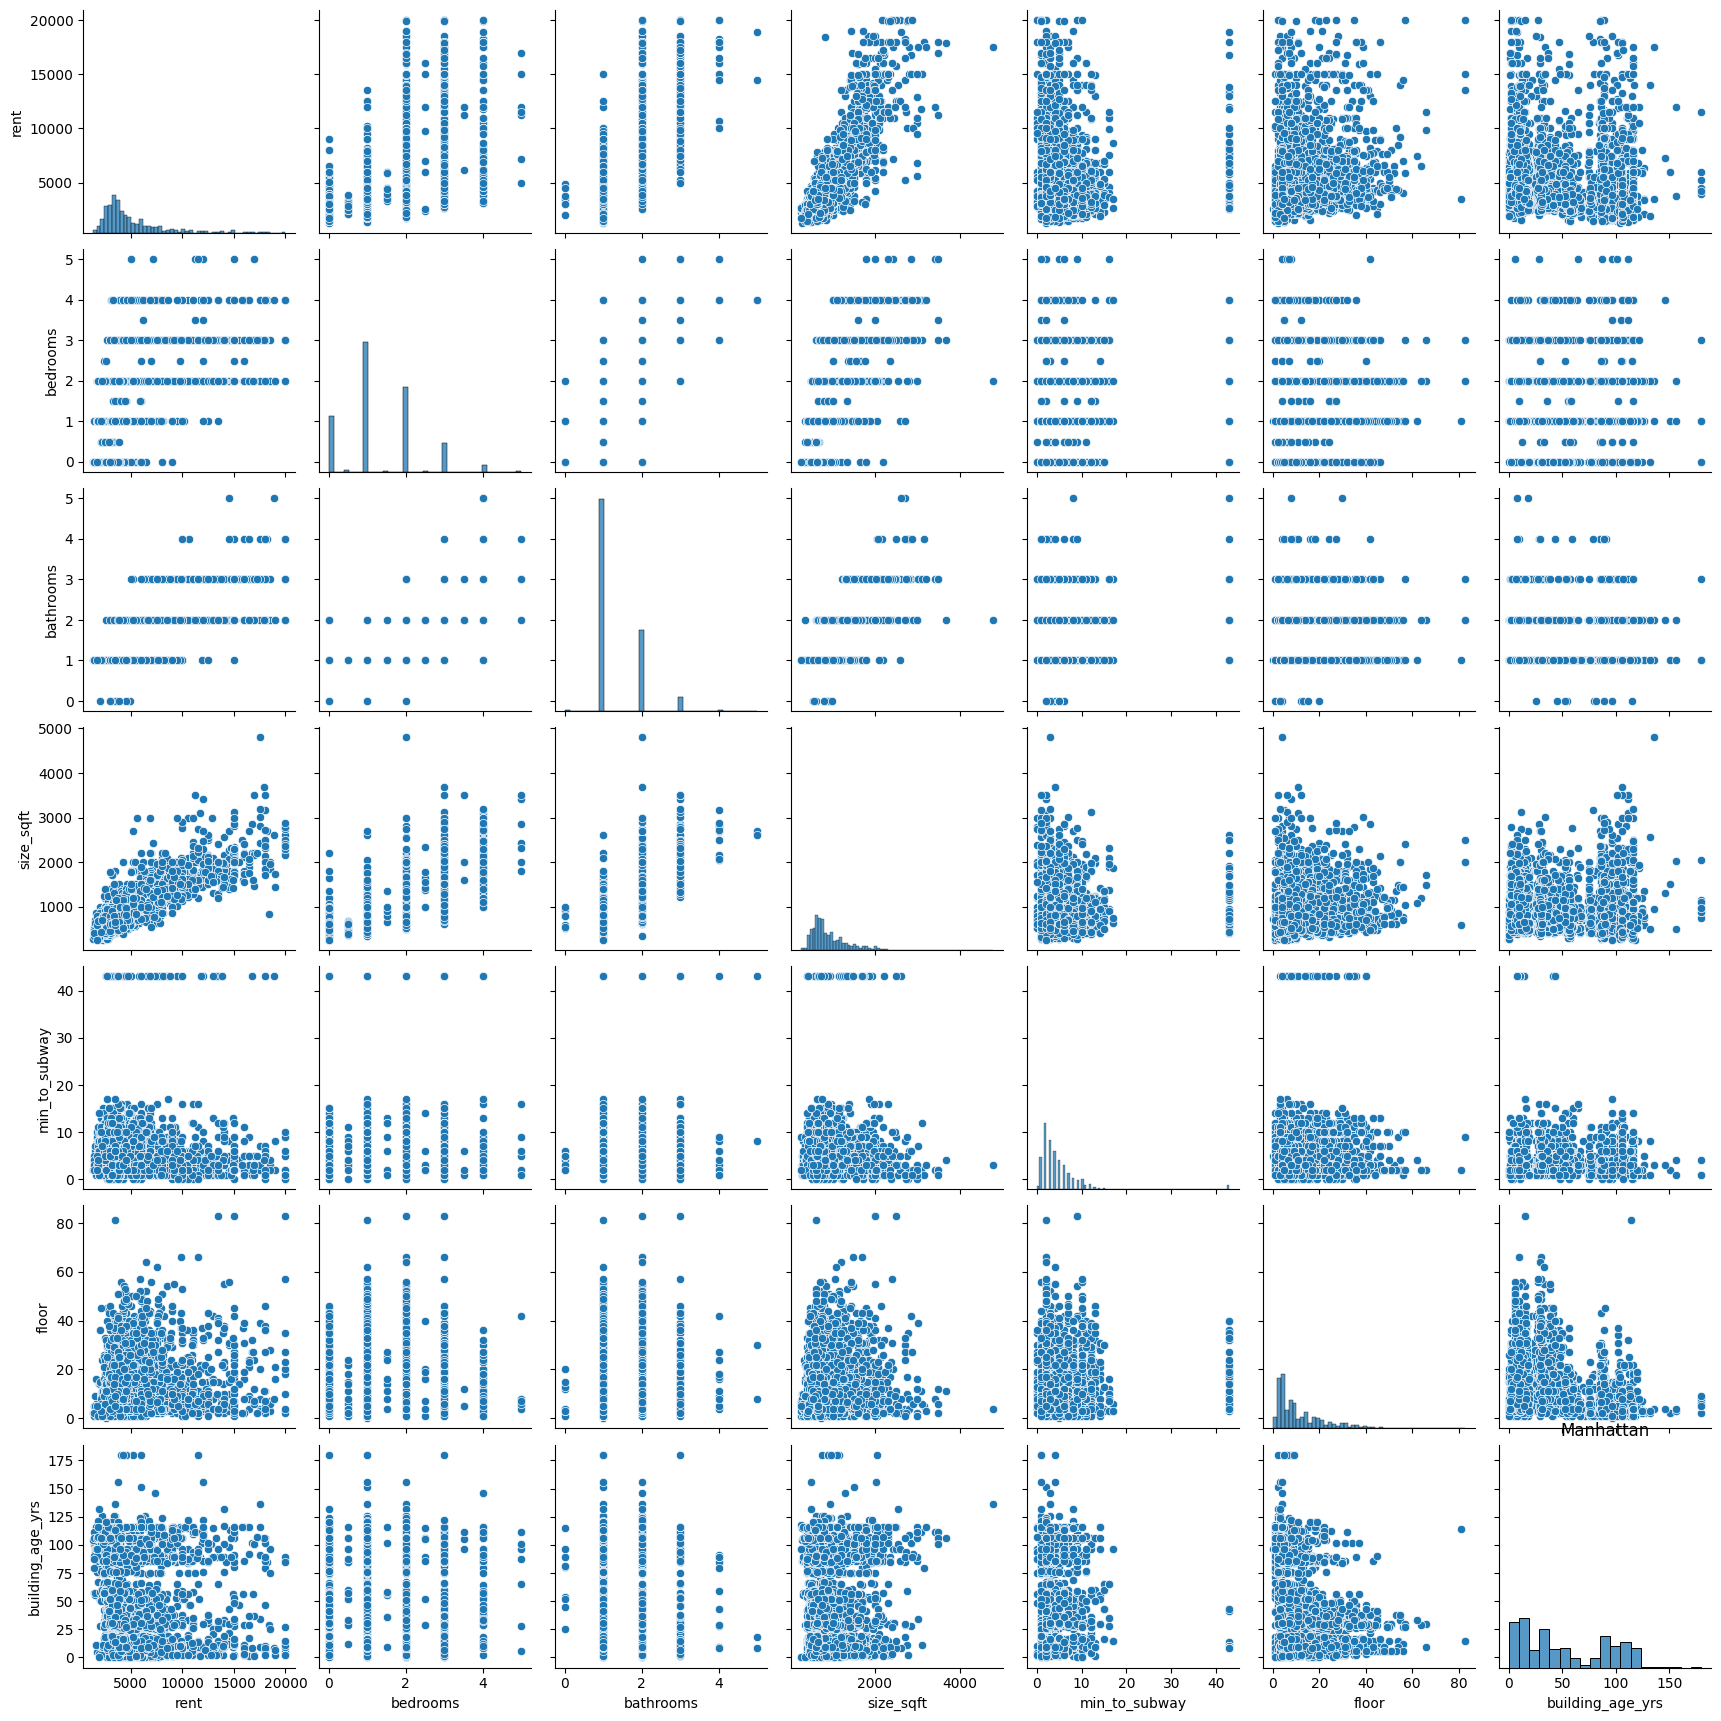

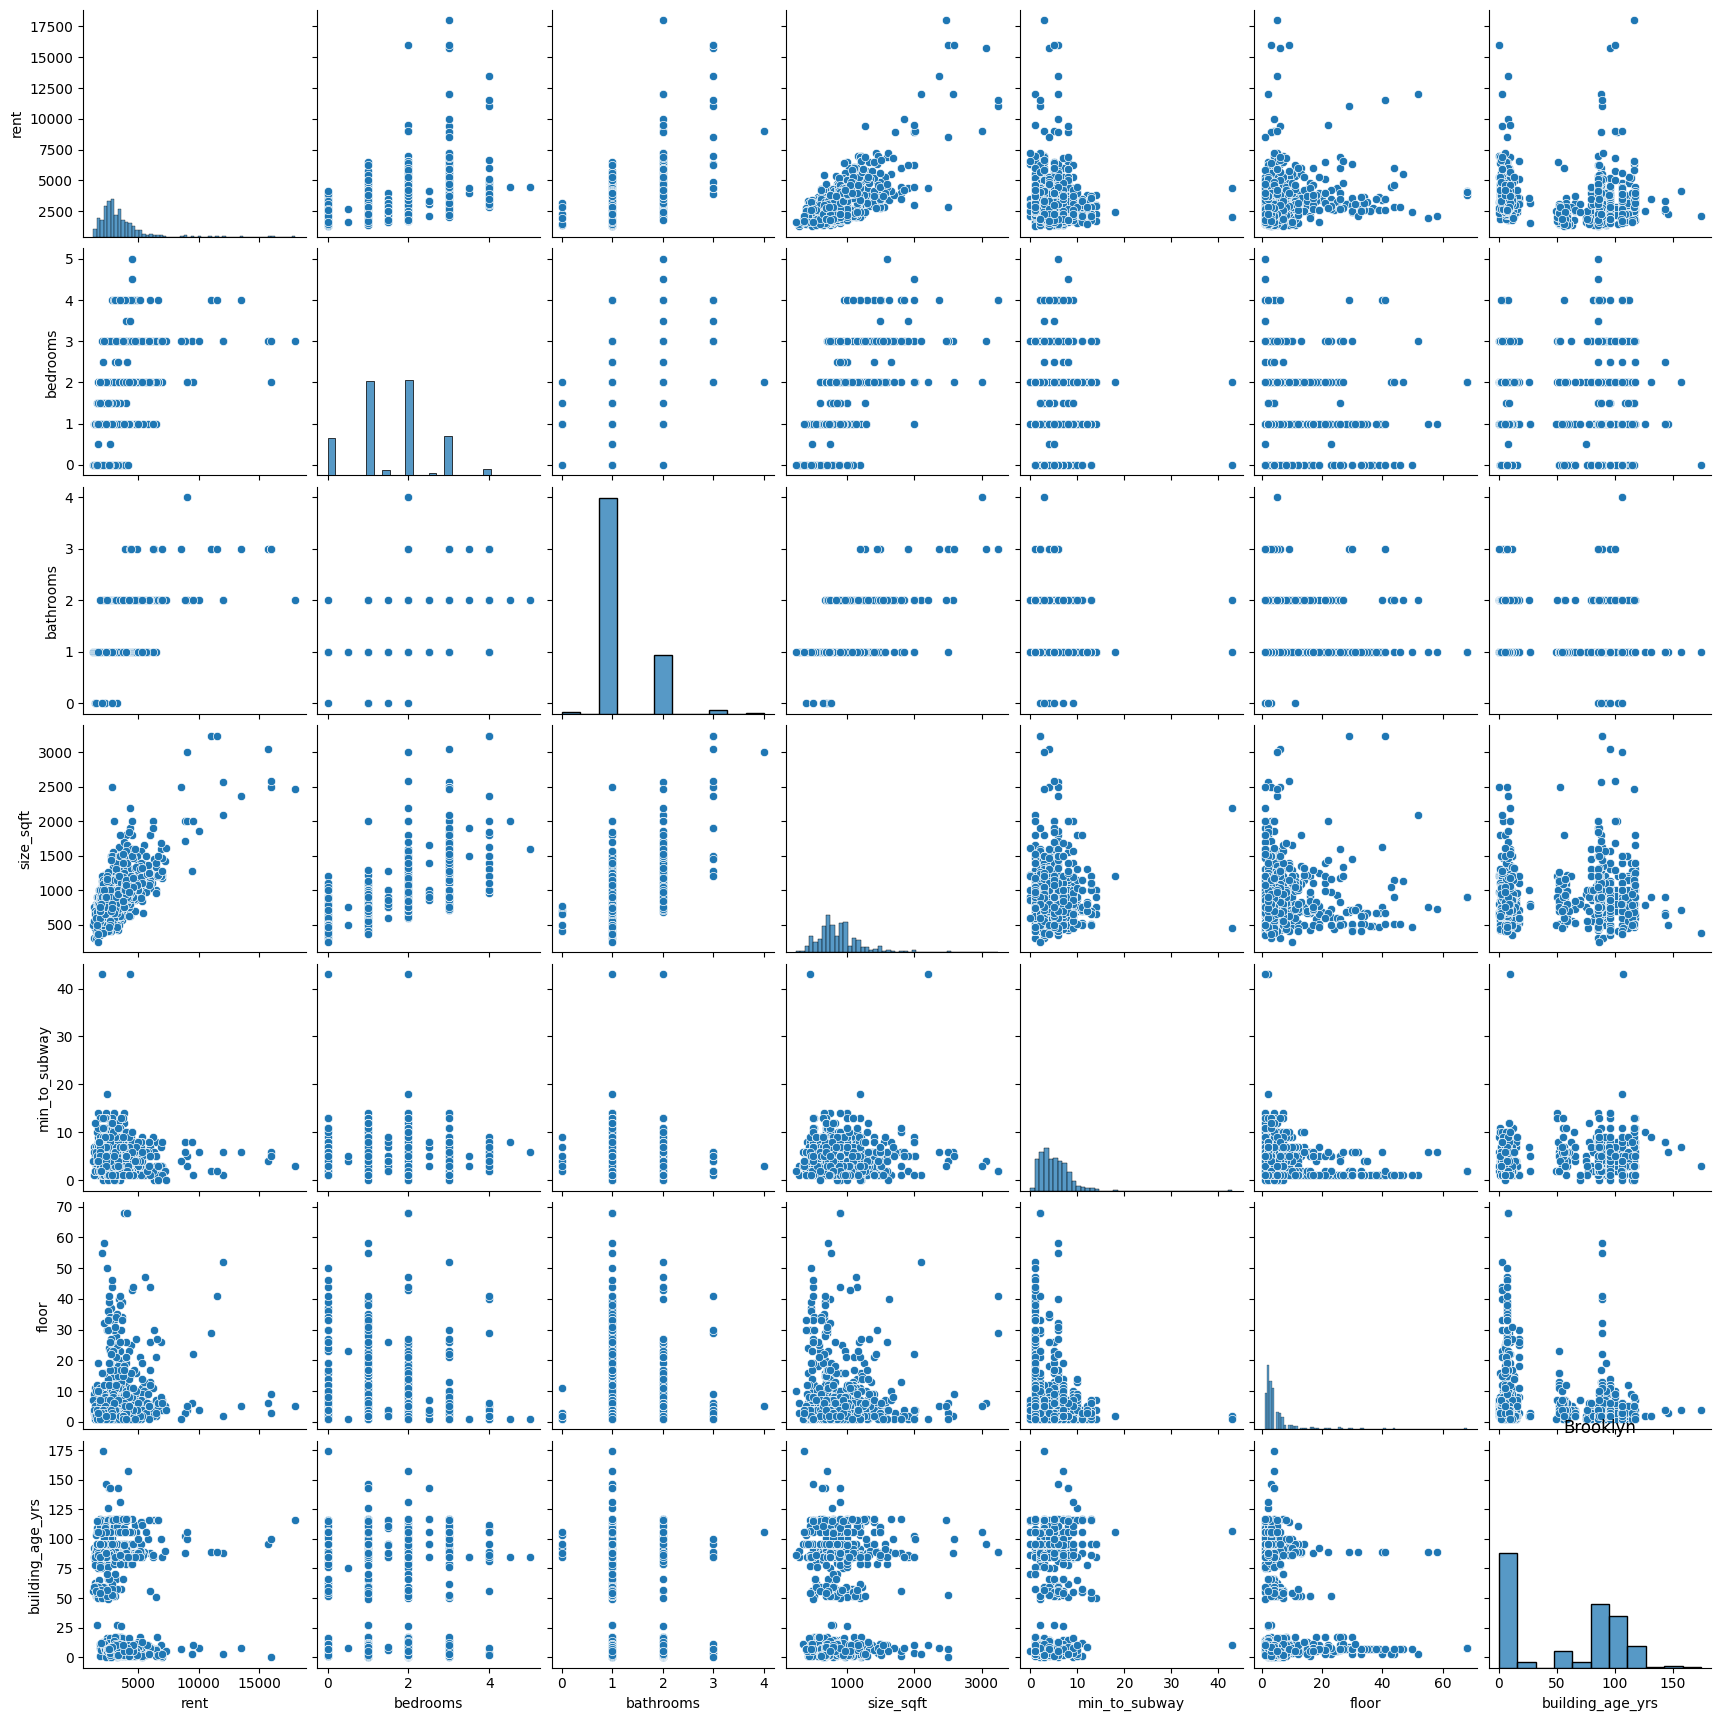

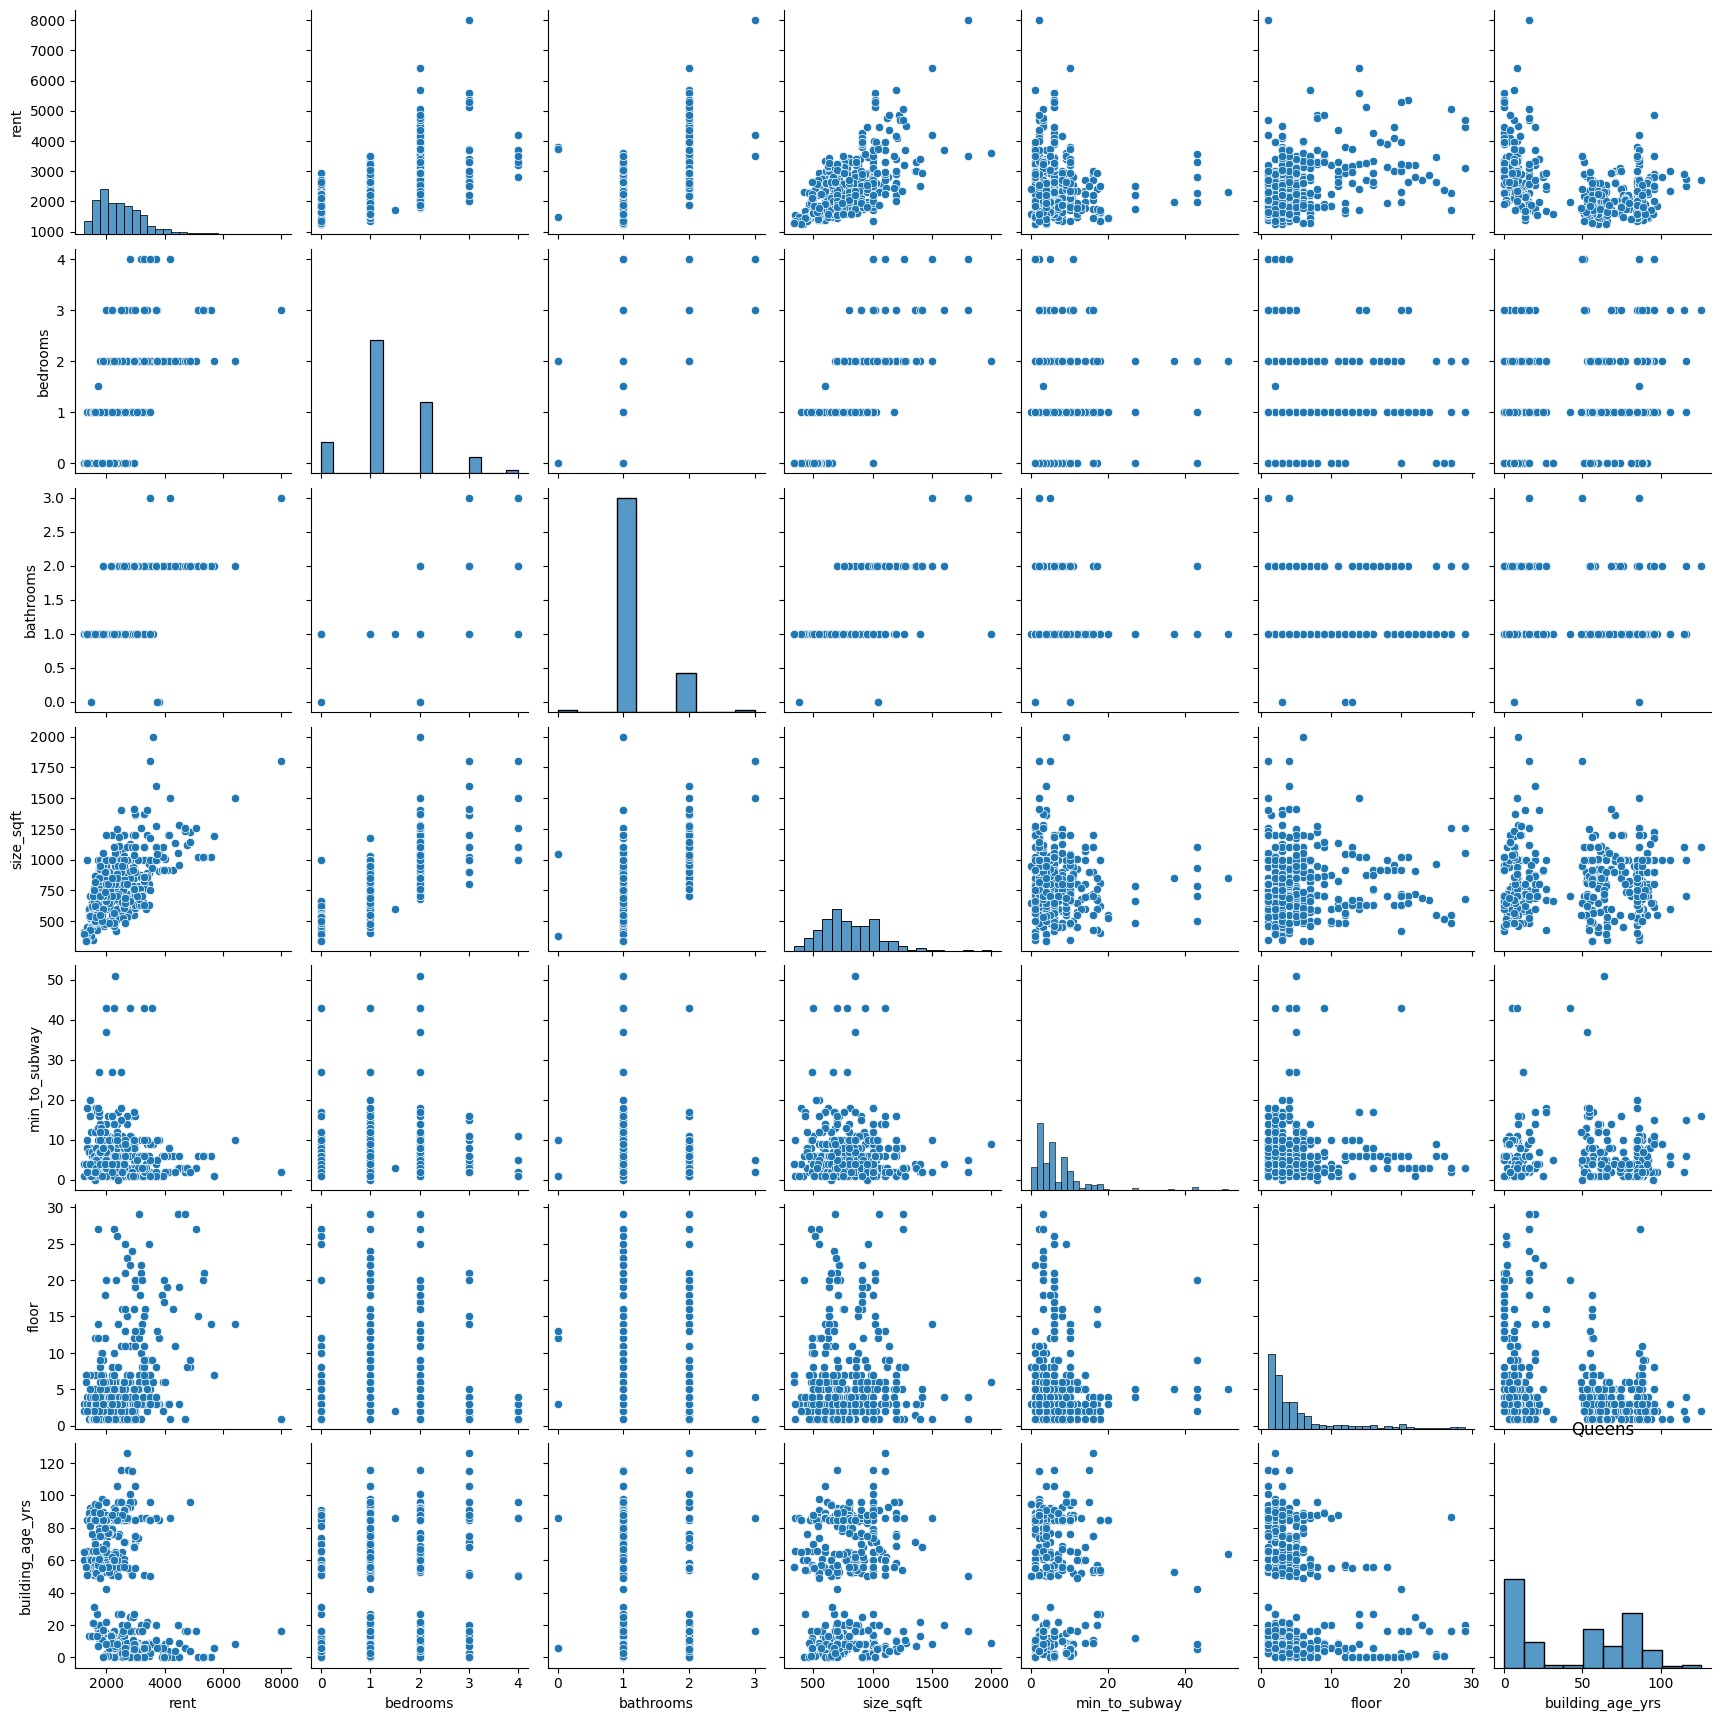

In [212]:
# Do not include the binary categorical variables as seaborn will misinterpret them

for borough, df in datasets.items():
    numerical_df = df[['rent','bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
                'building_age_yrs']]
    sns.pairplot(numerical_df)
    plt.title(f"{borough}")
    plt.show()

In the above pairwise plots there is no evidence of multicollinearity and many of the features have linear relationships with rent, thus linear regression is a suitable model choice. Notably there is a strong postive linear relationship between size_sqf and rent. This is further visualised using the correlation heatmaps.


In [213]:
# for borough, df in datasets.items():
#     df['rent'] = np.log1p(df['rent']) 

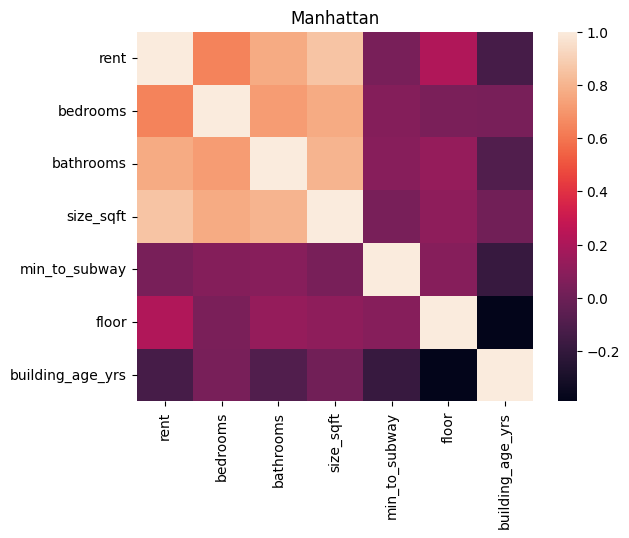

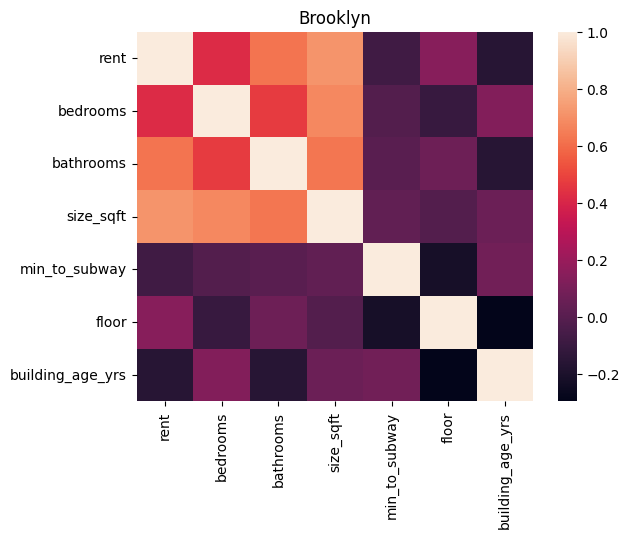

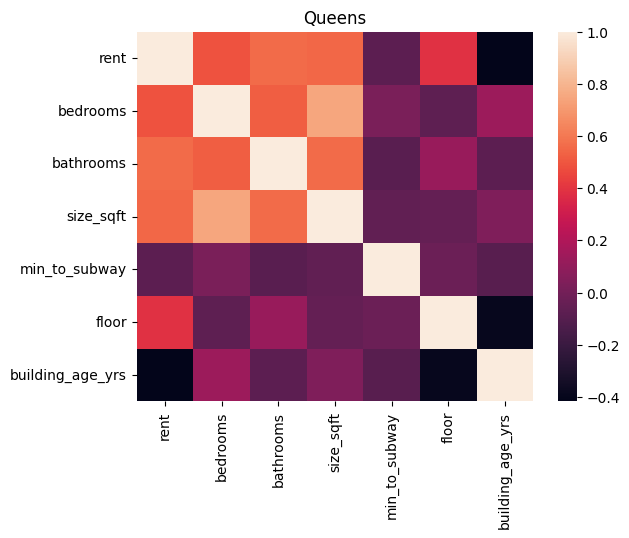

In [214]:
for borough, df in datasets.items():
    numerical_df = df[['rent','bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
                'building_age_yrs']]
    sns.heatmap(numerical_df.corr())
    plt.title(f"{borough}")
    plt.show()

Bedrooms, bathrooms and size, as we may have expected, are correlated to rent the most.

<h2>Visualising the categorical data</h2>

The dataset contains many binary variables represented yes or no mapped to 0 or 1 values. It is important to viualise these to understand the impact they have on rental prices too.

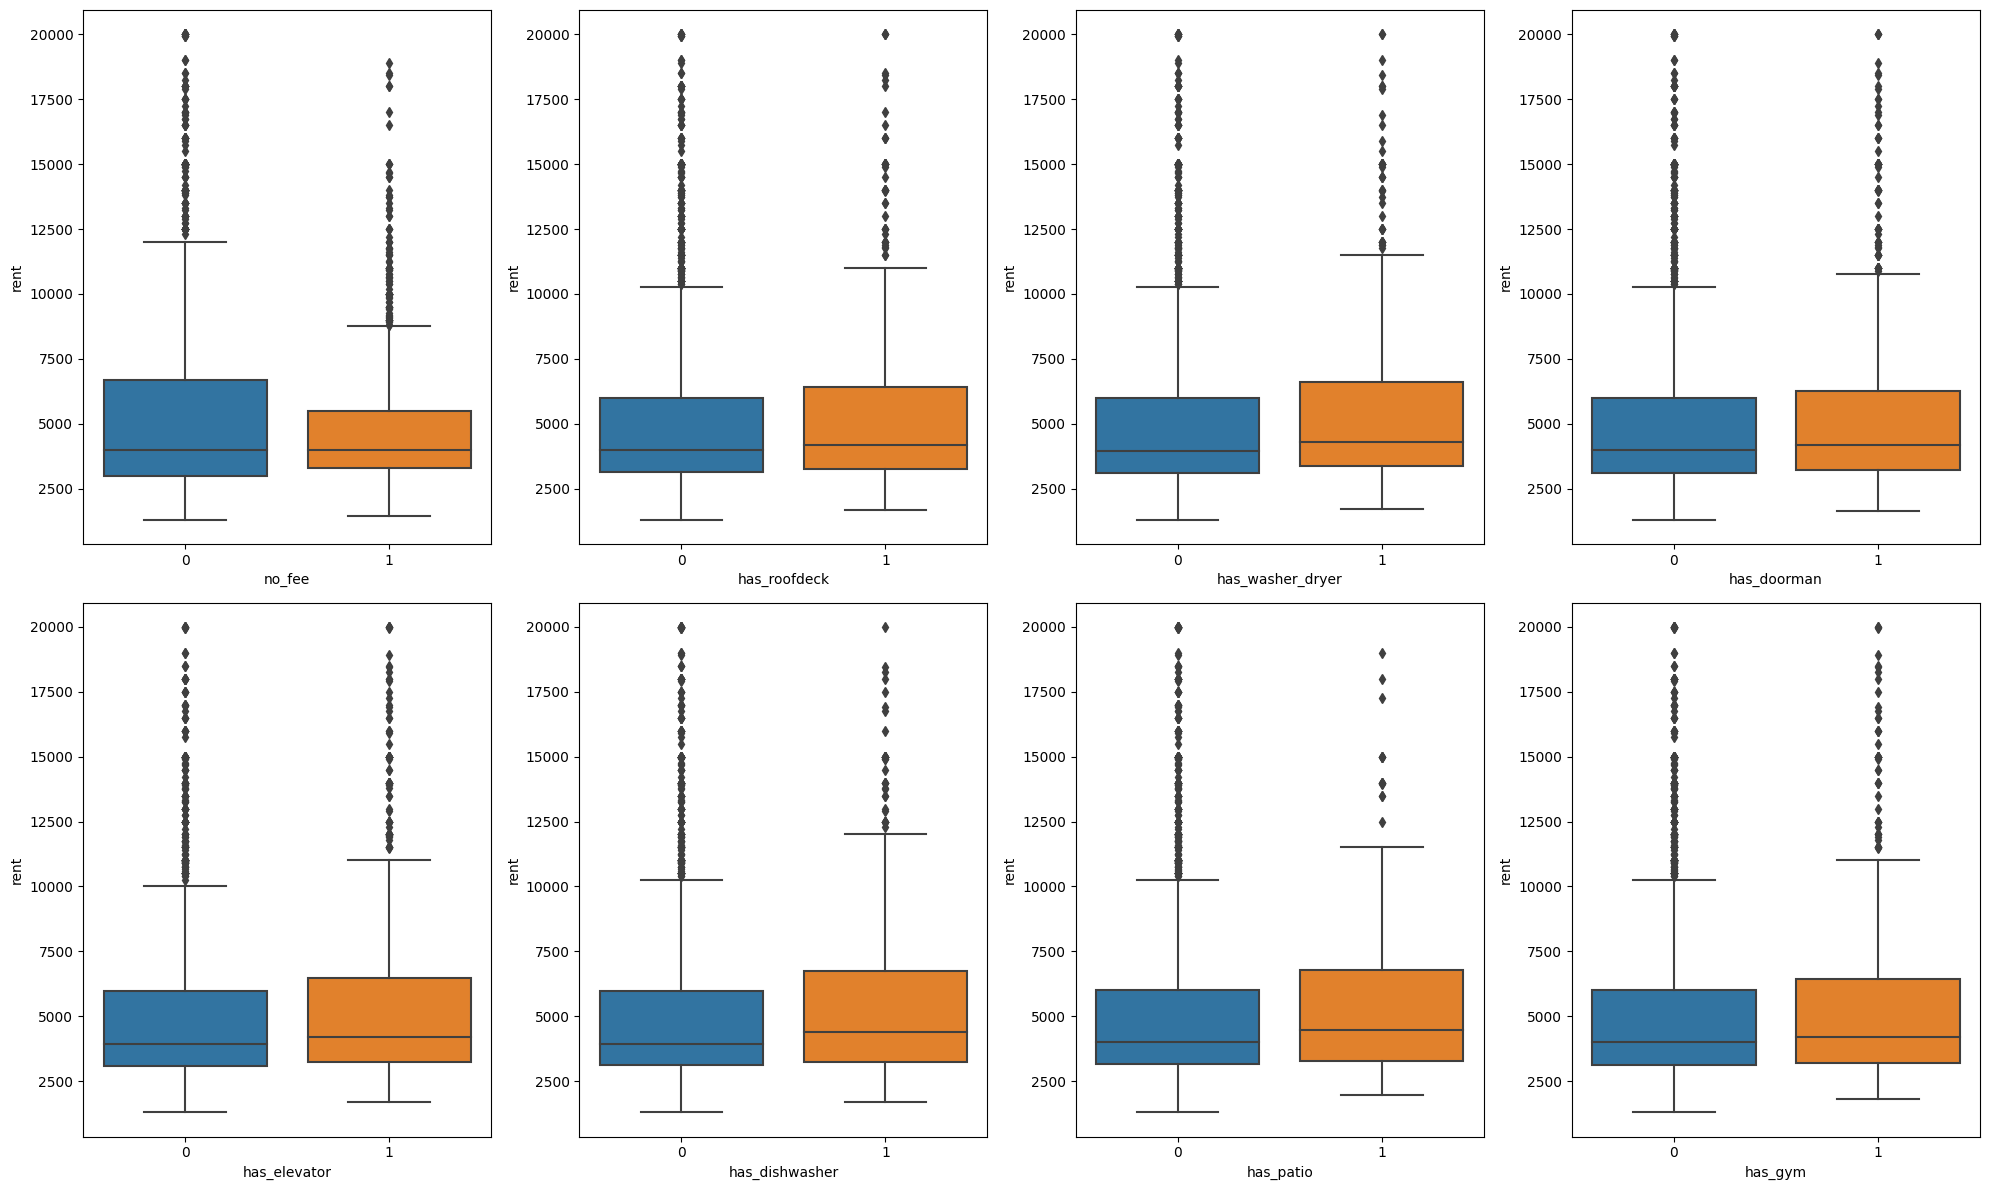

In [215]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'no_fee', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,2)
sns.boxplot(x = 'has_roofdeck', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,3)
sns.boxplot(x = 'has_washer_dryer', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,4)
sns.boxplot(x = 'has_doorman', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,5)
sns.boxplot(x = 'has_elevator', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,6)
sns.boxplot(x = 'has_dishwasher', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,7)
sns.boxplot(x = 'has_patio', y = 'rent', data = streeteasy_manhattan)
plt.subplot(2,4,8)
sns.boxplot(x = 'has_gym', y = 'rent', data = streeteasy_manhattan)
plt.tight_layout()
plt.show()

<h2>Data Preparation</h2>
All features besides 'size_sqft' and 'building_age_yrs' have fairly small values.

It is important to rescale the variables so that they have a comparable scale, otherwise some coefficients obtained by the regression model might be large or small compared to the other coefficients. This might become annoying at the time of model evaluation. In this case I am going to employ Min-Max scaling.

In [216]:
# Split into training and test:
df_train_manhattan, df_test_manhattan = train_test_split(streeteasy_manhattan, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train_brooklyn, df_test_brooklyn = train_test_split(streeteasy_brooklyn, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train_queens, df_test_queens = train_test_split(streeteasy_queens, train_size = 0.7, test_size = 0.3, random_state = 100)

In [217]:
training_datasets = {
    "Manhattan": df_train_manhattan.copy(),
    "Brooklyn": df_train_brooklyn.copy(),
    "Queens": df_train_queens.copy()
}

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler = MinMaxScaler()
# Apply the scalar to the numerical values in the dataframes only
for borough, df in training_datasets.items():
    numerical_df = df[['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
                'building_age_yrs']]
    scaler.fit_transform(numerical_df)

In [220]:
def train_rent_model(df):
    features = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
                'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
                'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']
    X = df[features]
    y = df['rent']
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return model, features, y_pred, x_train, x_test, y_train, y_test


In [221]:
models = {}
feature_sets = {}

for borough, df in datasets.items():
    model, features, y_pred, x_train, x_test, y_train, y_test = train_rent_model(df)
    models[borough] = model
    feature_sets[borough] = features
    print(f"{borough} feature importtance: {model.coef_}")

Manhattan feature importtance: [-323.18037846 1100.36073483    5.06791062  -18.53594813   24.06766806
   -7.28400695  -91.86128717   23.51171345   77.5829648  -147.8475012
   76.46277834    7.26226214 -143.278248     17.3709914 ]
Brooklyn feature importtance: [-197.16555628  869.99487972    2.90633639  -34.6972288    15.3747535
   -2.6691462   161.58010336  198.44626727   16.40954452 -219.90820449
   67.36567857   24.17833166  192.77918155  401.80446077]
Queens feature importtance: [ 258.54202615  459.73378978    0.99903247  -12.80464746   35.56759266
   -7.60987339  252.40386852   99.42026857  100.95786464  -57.54084658
  212.32096193 -181.7153576   266.55671217   56.68445787]


In [222]:
def create_predictor(borough):
    clear_output(wait=True)
    display(borough_selector)

    model = models[borough]
    features = feature_sets[borough]
    
    input_widgets = {
        'bedrooms': widgets.IntSlider(value=1, min=0, max=5),
        'bathrooms': widgets.FloatSlider(value=1.0, min=0.5, max=4.0, step=0.5),
        'size_sqft': widgets.IntSlider(value=500, min=200, max=2000),
        'min_to_subway': widgets.IntSlider(value=5, min=0, max=30),
        'floor': widgets.IntSlider(value=1, min=0, max=50),
        'building_age_yrs': widgets.IntSlider(value=10, min=0, max=100),
        'no_fee': widgets.Checkbox(value=True),
        'has_roofdeck': widgets.Checkbox(value=False),
        'has_washer_dryer': widgets.Checkbox(value=False),
        'has_doorman': widgets.Checkbox(value=False),
        'has_elevator': widgets.Checkbox(value=True),
        'has_dishwasher': widgets.Checkbox(value=False),
        'has_patio': widgets.Checkbox(value=False),
        'has_gym': widgets.Checkbox(value=False)
    }

    ui = widgets.VBox([widgets.HBox([widgets.Label(k), v]) for k, v in input_widgets.items()])
    display(ui)

    def predict_rent(**kwargs):
        cleaned_input = {k: int(v) if isinstance(v, bool) else v for k, v in kwargs.items()}
        X_input = pd.DataFrame([[cleaned_input[f] for f in features]], columns=features)
        prediction = model.predict(X_input)[0]
        print(f"Predicted Rent for {borough}: ${prediction:.2f}")

    out = widgets.interactive_output(predict_rent, input_widgets)
    display(out)


borough_selector = widgets.Dropdown(options=datasets.keys(), description='Borough:')
display(borough_selector)

create_predictor(borough_selector.value)

def on_change(change):
    if change['name'] == 'value':
        create_predictor(change['new'])

borough_selector.observe(on_change)
borough_selector = widgets.Dropdown(options=datasets.keys(), description='Borough:')
display(borough_selector)

create_predictor(borough_selector.value)

def on_change(change):
    if change['name'] == 'value':
        create_predictor(change['new'])

borough_selector.observe(on_change)

Dropdown(description='Borough:', options=('Manhattan', 'Brooklyn', 'Queens'), value='Manhattan')

Output()

<h2>Residual Analysis of the Training Data</h2>
Linear regression models assume error terms are normally distributed.

Text(0.5, 1.0, 'Residual Distribution')

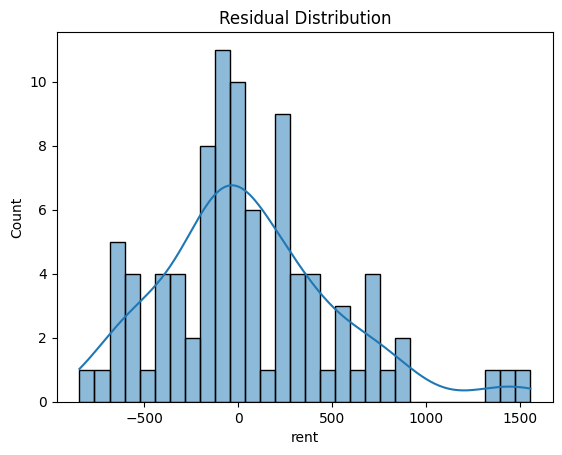

In [223]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 348.13178525851623
MSE: 221577.42833831013
RMSE: 470.72011677674254
R² Score: 0.6223274215888427


Without transforming the rent using log, the model is not the most accurate initially. The mean absolute error suggests on average predictions are off by about $348. The coefficient of determination is 0.6223, the closer to one the better. The model explain about 62.2% of the variance in prices. The model requires further feature engineering to further improve the accuracy.

When transforming the rent logarithmically, it infact made the model perform worse and less interpretable.

As a baseline model this can be acceptable as it is quick and simple to implement.